findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


current figure and save dpi = 160; current single fig size = (8, 4)


findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


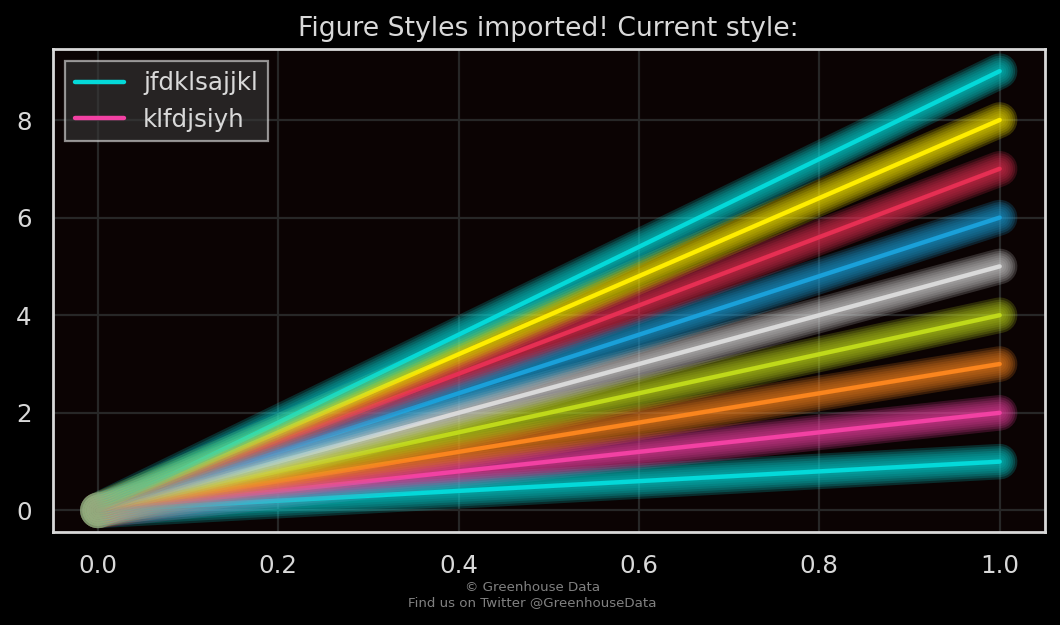

styles imported!


In [1]:
# %run Requirements.ipynb
%run Figure_Styles.ipynb

In [2]:
import random
import os
import glob
import shutil
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Random Fig

In [3]:
random_country_dir = random.choice(os.listdir("../country_data"))
random_country_dir

'SGP_Singapore'

In [4]:
figures = glob.glob(f"../country_data/{random_country_dir}/figures/*.png", recursive = True)
figures

['../country_data/SGP_Singapore/figures/SGP_CAIT_gases_1.png',
 '../country_data/SGP_Singapore/figures/SGP_GCP_Country_Highlight.png',
 '../country_data/SGP_Singapore/figures/SGP_CO2_totals.png',
 '../country_data/SGP_Singapore/figures/SGP_EIA_1.png',
 '../country_data/SGP_Singapore/figures/SGP_BP_1.png',
 '../country_data/SGP_Singapore/figures/SGP_GCP_1.png',
 '../country_data/SGP_Singapore/figures/SGP_UNFCCC_NAI_1.png',
 '../country_data/SGP_Singapore/figures/SGP_CAIT_lucf_vs_nolucf.png',
 '../country_data/SGP_Singapore/figures/SGP_IEA_1.png',
 '../country_data/SGP_Singapore/figures/SGP_CDIAC_1.png',
 '../country_data/SGP_Singapore/figures/SGP_Minx_top20_subsectors.png']

In [5]:
random_fig = random.choice(figures)
random_fig

'../country_data/SGP_Singapore/figures/SGP_EIA_1.png'

In [6]:
shutil.copyfile(random_fig, "../supplemental/random_daily_fig.png",)

'../supplemental/random_daily_fig.png'

In [7]:
print("random_fig path imported")

random_fig path imported


# Update NOAA Data & Graph

## Get data

### CO2

In [8]:
df_co2_raw_txt = pd.read_fwf("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv")
file_creation_date = list(df_co2_raw_txt.iloc[:,0])[20]
file_creation_date

'# File Creation:  Thu May  5 05:00:13 2022'

In [9]:
df_co2_raw = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv", header=47)

# add datetime columns
df_co2 = df_co2_raw

df_co2["date"] = np.nan
for i,j in enumerate(df_co2.index):
    df_co2.loc[j,"date"] = str(int(df_co2.loc[j].year)) + "-" + str(int(df_co2.loc[j].month)) + "-" + str(int(df_co2.loc[j].day)) 
df_co2["date"] = pd.to_datetime(df_co2["date"]) #, format = "%Y-%m-%d", yearfirst=True

#drop
df_co2 = df_co2[df_co2.average > -998]

df_co2

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800,date
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40,1974-05-19
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60,1974-06-02
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65,1974-06-09
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06,1974-06-16
...,...,...,...,...,...,...,...,...,...,...
2497,2022,3,27,2022.2342,420.37,7,417.41,395.30,138.47,2022-03-27
2498,2022,4,3,2022.2534,420.19,6,419.62,395.58,137.98,2022-04-03
2499,2022,4,10,2022.2726,420.16,6,419.00,396.76,137.60,2022-04-10
2500,2022,4,17,2022.2918,420.35,7,418.15,396.38,137.46,2022-04-17


### CH4

In [10]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_mm_gl.txt"
df_ch4_raw = pd.read_csv(url, delim_whitespace=True, header = 62)

#fix columns
df_ch4 = df_ch4_raw
wrong_columns = df_ch4.columns
df_ch4 = df_ch4.drop("trend_unc", axis=1)
df_ch4 = df_ch4.rename(dict(zip(df_ch4.columns, wrong_columns[1:])), axis=1)

# add datetime columns
df_ch4["date"] = np.nan
for i,j in enumerate(df_ch4.index):
    df_ch4.loc[j,"date"] = str(int(df_ch4.loc[j].year)) + "-" + str(int(df_ch4.loc[j].month)) 
df_ch4["date"] = pd.to_datetime(df_ch4["date"]) #, format = "%Y-%m-%d", yearfirst=True

#drop
df_ch4 = df_ch4[df_ch4.average > -998]


df_ch4

,year,month,decimal,average,average_unc,trend,trend_unc,date
0,1983,7,1983.542,1625.9,2.3,1635.1,1.5,1983-07-01
1,1983,8,1983.625,1628.1,2.9,1635.6,1.4,1983-08-01
2,1983,9,1983.708,1638.4,2.3,1636.1,1.3,1983-09-01
3,1983,10,1983.792,1644.8,1.4,1636.7,1.2,1983-10-01
4,1983,11,1983.875,1642.6,0.8,1637.4,1.2,1983-11-01
...,...,...,...,...,...,...,...,...
458,2021,9,2021.708,1902.6,-9.9,1900.0,-9.9,2021-09-01
459,2021,10,2021.792,1908.0,-9.9,1901.3,-9.9,2021-10-01
460,2021,11,2021.875,1910.2,-9.9,1902.6,-9.9,2021-11-01
461,2021,12,2021.958,1910.6,-9.9,1903.7,-9.9,2021-12-01


### N2O

In [11]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/n2o/n2o_mm_gl.txt"

df_n2o_raw = pd.read_csv(url, delim_whitespace=True, header = 62)

#fix columns
df_n2o = df_n2o_raw
wrong_columns = df_n2o.columns
df_n2o = df_n2o.drop("trend_unc", axis=1)
df_n2o = df_n2o.rename(dict(zip(df_n2o_raw.columns, wrong_columns[1:])), axis=1)


# add datetime columns
df_n2o["date"] = np.nan
for i,j in enumerate(df_n2o.index):
    df_n2o.loc[j,"date"] = str(int(df_n2o.loc[j].year)) + "-" + str(int(df_n2o.loc[j].month)) 
df_n2o["date"] = pd.to_datetime(df_n2o["date"]) #, format = "%Y-%m-%d", yearfirst=True

#drop
df_n2o = df_n2o[df_n2o.average > -998]


df_n2o

,year,month,decimal,average,average_unc,trend,trend_unc,date
0,2001,1,2001.042,316.3,0.2,316.0,0.1,2001-01-01
1,2001,2,2001.125,316.3,0.2,316.1,0.1,2001-02-01
2,2001,3,2001.208,316.2,0.2,316.2,0.1,2001-03-01
3,2001,4,2001.292,316.1,0.1,316.2,0.1,2001-04-01
4,2001,5,2001.375,316.1,0.1,316.3,0.1,2001-05-01
...,...,...,...,...,...,...,...,...
248,2021,9,2021.708,334.4,-9.9,334.6,-9.9,2021-09-01
249,2021,10,2021.792,334.6,-9.9,334.7,-9.9,2021-10-01
250,2021,11,2021.875,334.9,-9.9,334.8,-9.9,2021-11-01
251,2021,12,2021.958,335.1,-9.9,334.9,-9.9,2021-12-01


## Graph

In [12]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle

['#04D9D9',
 '#F241A3',
 '#FA851E',
 '#BFD91A',
 '#D9D9D9',
 '#1AA0D9',
 '#E62F53',
 '#FEED00']

In [13]:
from matplotlib.dates import date2num       #-->Update

findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Manjari'] not found. Falling back to DejaVu Sans.


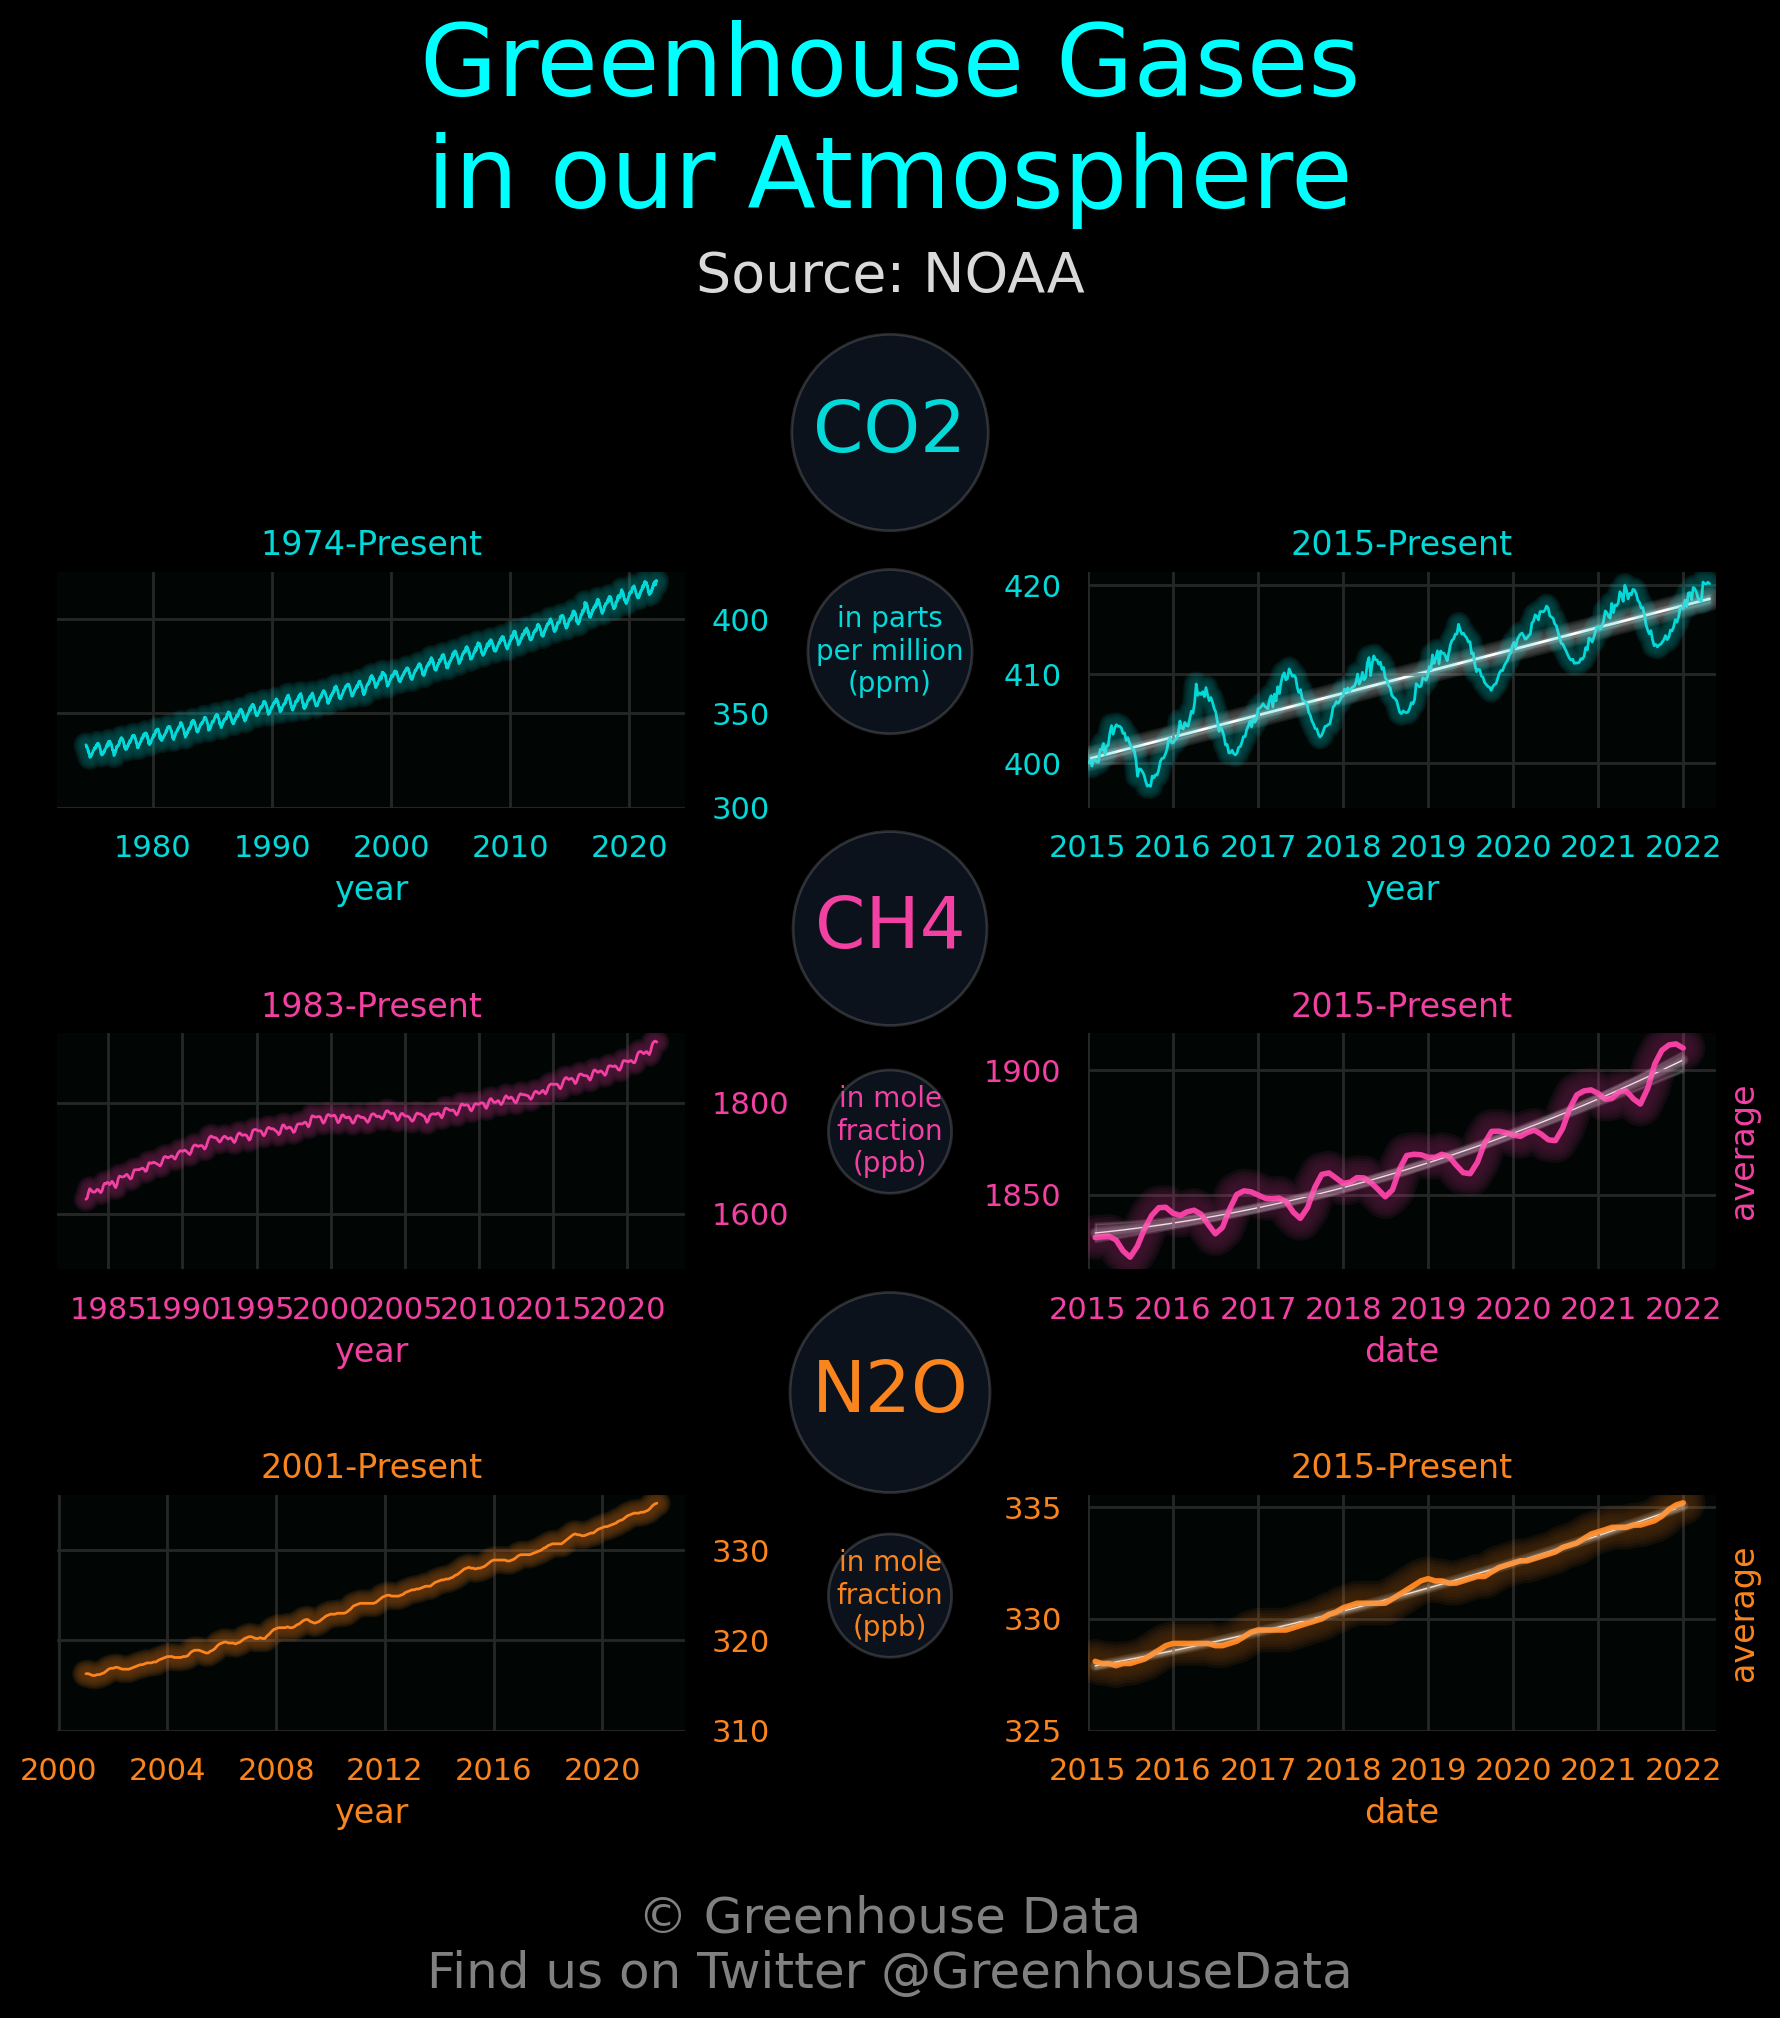

In [14]:
start_year = 2015
lw_l = 1
lw_r = 1


##

fig, axs = plt.subplots(3,2, figsize=(9,8), dpi=200)
axs = axs.flatten()

fig.suptitle("Greenhouse Gases\nin our Atmosphere", fontsize=36, color="cyan", y=1.15)
fig.text(x=.5, y=.98, s="Source: NOAA", ha="center", fontsize=20)

# CO2 - left
ax_co2 = axs[0]
ax_co2.set_title("1974-Present", color= color_cycle[0])
ax_co2.plot(df_co2.date, df_co2.average, color= color_cycle[0], lw=lw_l,zorder=5)

ax_co2.set_xlabel("year", color= color_cycle[0])
ax_co2.set_ylim(bottom=300)
ax_co2.set_ylabel("", color = color_cycle[0], rotation="horizontal", labelpad=70, ha="center", va="top")
ax_co2.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[0])
ax_co2.yaxis.set_label_position("right")

# CO2 ZOOM
df_co2_zoom = df_co2[df_co2.date > datetime(start_year,1,1)]

ax_co2_zoom = axs[1]
ax_co2_zoom.set_title(f"{str(start_year)}-Present", color= color_cycle[0])
line = ax_co2_zoom.plot(df_co2_zoom.date, df_co2_zoom.average, color= color_cycle[0], lw=lw_r)
sns.regplot(x=df_co2_zoom.date.apply(date2num), y=df_co2_zoom.average, ax=ax_co2_zoom, 
            scatter=False,dropna=True, color="w", line_kws={"zorder":0, "lw":lw_r})

ax_co2_zoom.set_xlabel("year", color= color_cycle[0])
ax_co2_zoom.set_xlim(left=datetime(start_year,1,1), right=datetime.now())
ax_co2_zoom.set_ylim(bottom=395)
ax_co2_zoom.set_ylabel("", color = color_cycle[0])
ax_co2_zoom.tick_params(labelleft = True, labelright=False, labelcolor = color_cycle[0])
ax_co2_zoom.yaxis.set_label_position("right")




# CH4 - LEFT
ax_ch4 = axs[2]
ax_ch4.set_title("1983-Present", color= color_cycle[1])
ax_ch4.plot(df_ch4.date, df_ch4.average, color= color_cycle[1], lw=lw_l)

ax_ch4.set_xlabel("year", color= color_cycle[1])
ax_ch4.set_ylim(bottom=1500)
ax_ch4.set_ylabel("", color = color_cycle[1])
ax_ch4.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[1])
ax_ch4.yaxis.set_label_position("right")


# CH4 ZOOM
df_ch4_zoom = df_ch4[df_ch4.date > datetime(start_year,1,1)]

ax_ch4_zoom = axs[3]
ax_ch4_zoom.set_title(f"{str(start_year)}-Present", color= color_cycle[1])
ax_ch4_zoom.plot(pd.to_datetime(df_ch4_zoom.date), df_ch4_zoom.average, color= color_cycle[1], lw=lw_r+1)

ax_ch4_zoom.set_xlabel("year", color= color_cycle[1])
ax_ch4_zoom.set_xlim(left=datetime(start_year,1,1), right=datetime.now())
ax_ch4_zoom.set_ylim(bottom=1820)
ax_ch4_zoom.set_ylabel("", color = color_cycle[1])
ax_ch4_zoom.tick_params(labelleft = True, labelright=False, labelcolor = color_cycle[1])
ax_ch4_zoom.yaxis.set_label_position("right")
sns.regplot(x=df_ch4_zoom.date.apply(date2num), y=df_ch4_zoom.average, ax=ax_ch4_zoom, 
            scatter=False,dropna=True, color="w", line_kws={"zorder":0, "lw":lw_r-.5}, order=2)




# N2O - LEFT
ax_n2o = axs[4]
ax_n2o.set_title("2001-Present", color= color_cycle[2])
ax_n2o.plot(df_n2o.date, df_n2o.average, color= color_cycle[2], lw=lw_l)

ax_n2o.set_xlabel("year", color= color_cycle[2])
ax_n2o.set_ylim(bottom=310)
ax_n2o.set_ylabel("", color = color_cycle[2])
ax_n2o.tick_params(labelleft = False, labelright=True, labelcolor = color_cycle[2])
ax_n2o.yaxis.set_label_position("right")


# N2O - zoom
df_n2o_zoom = df_n2o[df_n2o.date > datetime(start_year,1,1)]

ax_n2o_zoom = axs[5]
ax_n2o_zoom.set_title(f"{str(start_year)}-Present", color= color_cycle[2])
ax_n2o_zoom.plot(df_n2o_zoom.date, df_n2o_zoom.average, color = color_cycle[2], lw=lw_r+1)

ax_n2o_zoom.set_xlabel("year", color= color_cycle[2])
ax_n2o_zoom.set_xlim(left=datetime(start_year,1,1), right=datetime.now())
ax_n2o_zoom.set_ylim(bottom=325)
ax_n2o_zoom.set_ylabel("", color = color_cycle[2])
ax_n2o_zoom.tick_params(labelleft = True, labelright=False, labelcolor = color_cycle[2])
ax_n2o_zoom.yaxis.set_label_position("right")
sns.regplot(x=df_n2o_zoom.date.apply(date2num), y=df_n2o_zoom.average, ax=ax_n2o_zoom, 
            scatter=False,dropna=True, color="w", line_kws={"zorder":0, "lw":lw_r-.5}, order=2)







for i in range(6):
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_facecolor("#010605")





# Circles!
pad = .08
fig.text(x = .5,y = .96 - pad,s = "CO2", ha="center", color = color_cycle[0], bbox={"alpha":.16, "boxstyle":"circle"}, fontsize=26)
fig.text(x = .5,y = .65 - pad,s = "CH4", ha="center", color = color_cycle[1], bbox={"alpha":.16, "boxstyle":"circle"}, fontsize=26)
fig.text(x = .5,y = .36 - pad,s = "N2O", ha="center", color = color_cycle[2], bbox={"alpha":.16, "boxstyle":"circle"}, fontsize=26)

fig.text(x = .5,y = .81 - pad,s = "in parts\nper million\n(ppm)", ha="center", color = color_cycle[0], bbox={"alpha":.16, "boxstyle":"circle"})
fig.text(x = .5,y = .51 - pad,s = "in mole\nfraction\n(ppb)", ha="center", color = color_cycle[1], bbox={"alpha":.16, "boxstyle":"circle"})
fig.text(x = .5,y = .22 - pad,s = "in mole\nfraction\n(ppb)", ha="center", color = color_cycle[2], bbox={"alpha":.16, "boxstyle":"circle"})




NEONIZE(ax_co2, 9)
NEONIZE(ax_ch4, 9)
NEONIZE(ax_co2_zoom, 9)
NEONIZE(ax_n2o, 10)
NEONIZE(ax_ch4_zoom, 8)
NEONIZE(ax_n2o_zoom, 8)

add_GreenhouseData_trademark(fig, fontsize=18, y=-.08)

fig.tight_layout(h_pad = 3, w_pad = 7)